In [1]:
import os
import torch
import numpy as np
from PHASE import PHASE
from RSP import RSP

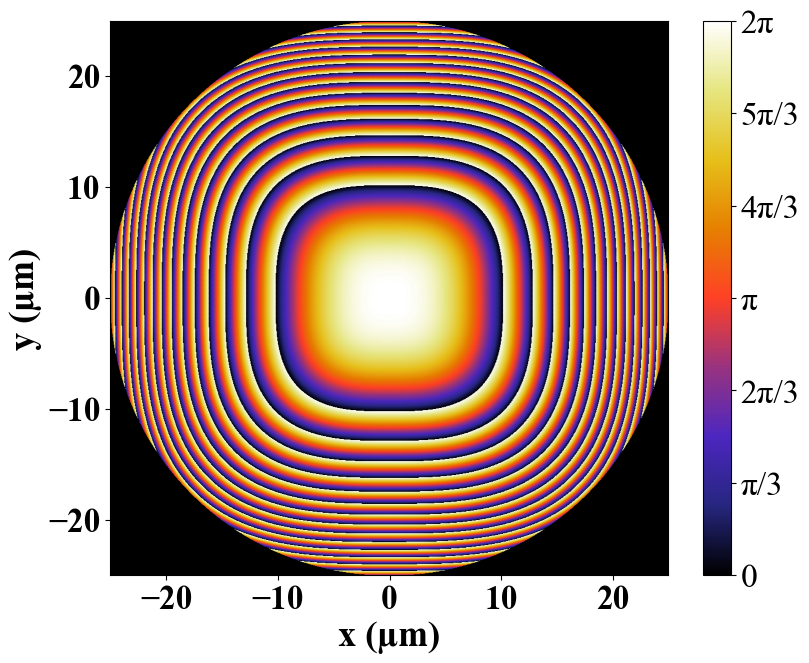

In [2]:
lens_diameter = 50.
focal_length = 100000.
design_lambda = 0.532
alpha = 2.5*np.pi
phase_type = 'abs_cubic' # choose 'abs_cubic' or 'cubic' or 'EP'
device = 'cuda' if torch.cuda.is_available() else 'cpu'

os.makedirs(f"result/{phase_type}/xz-plane", exist_ok=True)
os.makedirs(f"result/{phase_type}/xy-plane", exist_ok=True)

lens = PHASE(lens_diameter = lens_diameter, 
                focal_length = focal_length, 
                design_lambda = design_lambda, 
                alpha = alpha, 
                phase_type = phase_type, 
                device = device)
lens.draw()

In [3]:
def sim_focal_XZ(lens = PHASE, lamb0 = 0.532, cx = 0, cy =0, xz_x = 30., xz_z = np.arange(10, 151, 1), sampling = 201):
    rsp_xz = RSP(lens = lens, 
                    cx = 0, 
                    cy = 0, 
                    screen_size = xz_x,
                    sampling = sampling, 
                    device=device)
    rsp_xz.RSP_XZ_GPU(RSP_lambda = lamb0, focal_Z = xz_z)
    rsp_xz.draw_XZ()

def sim_focal_XY(lens = PHASE, lamb0 = 0.532, cx = 0, cy =0, xy_x = 30., xy_z = 90., sampling = 201):
    rsp_xy = RSP(lens = lens, 
                    cx = 0, 
                    cy = 0, 
                    screen_size = xy_x, 
                    sampling = sampling, 
                    device=device)
    rsp_xy.RSP_XY_GPU(RSP_lambda= lamb0, z = xy_z)
    rsp_xy.draw_XY()

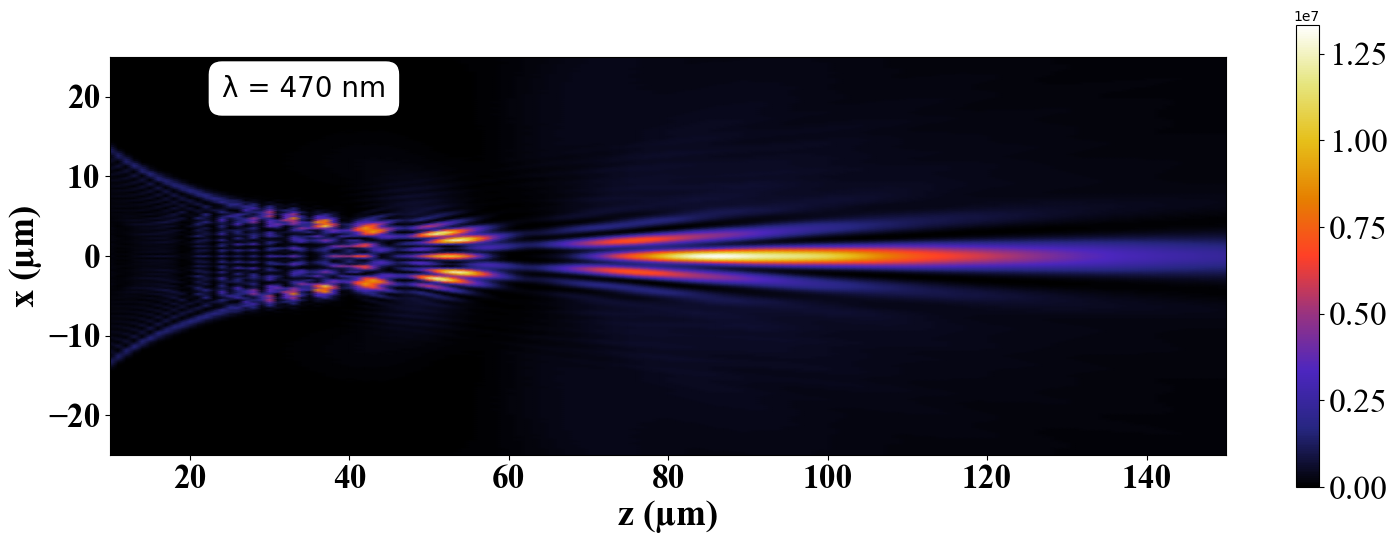

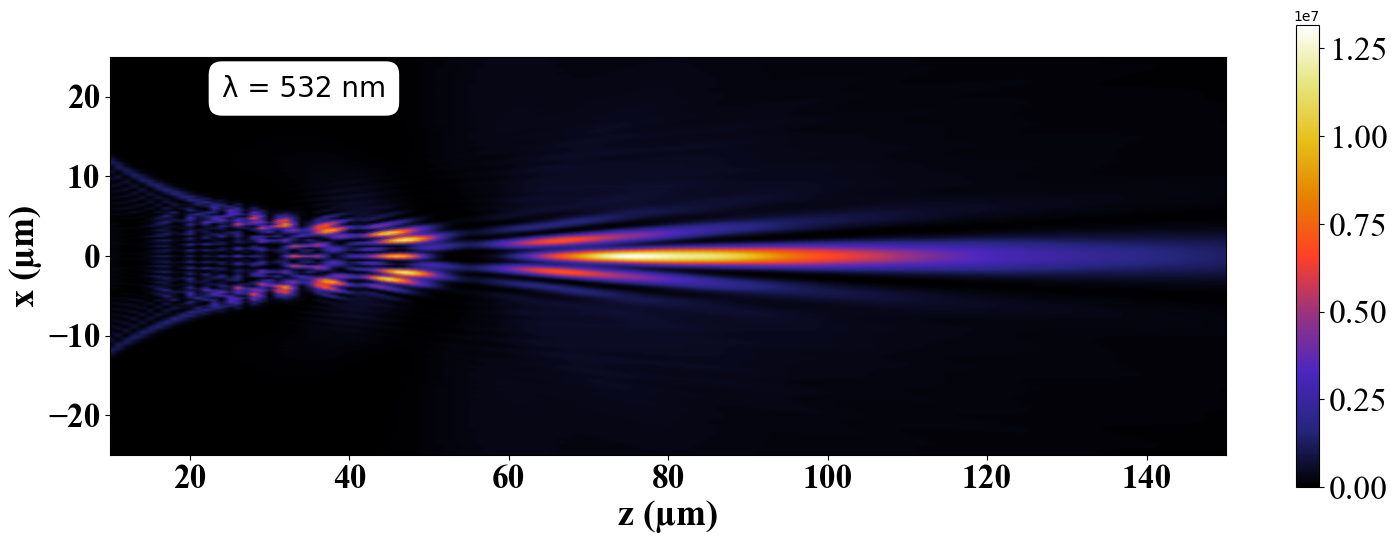

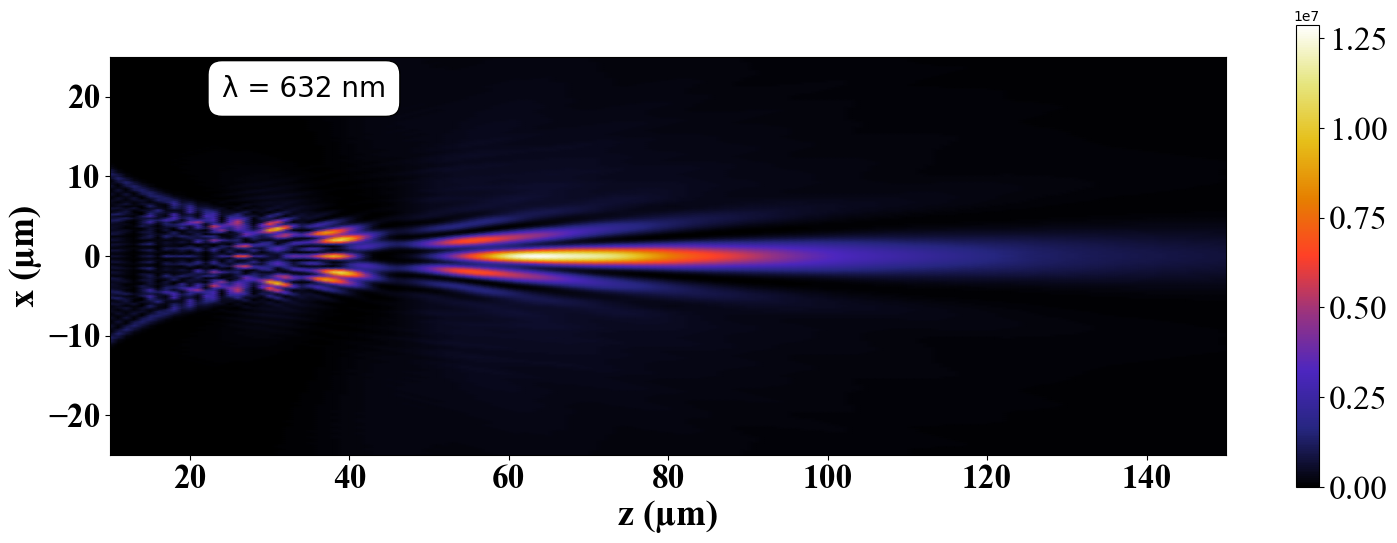

In [4]:
xz_x = 50.
sampling = 201
xz_z = np.arange(10, 151, 1)
for lamb0 in [0.47, 0.532, 0.6328]:
    sim_focal_XZ(lens = lens, lamb0 = lamb0, cx = 0, cy =0, xz_x = xz_x, xz_z = xz_z, sampling = sampling)

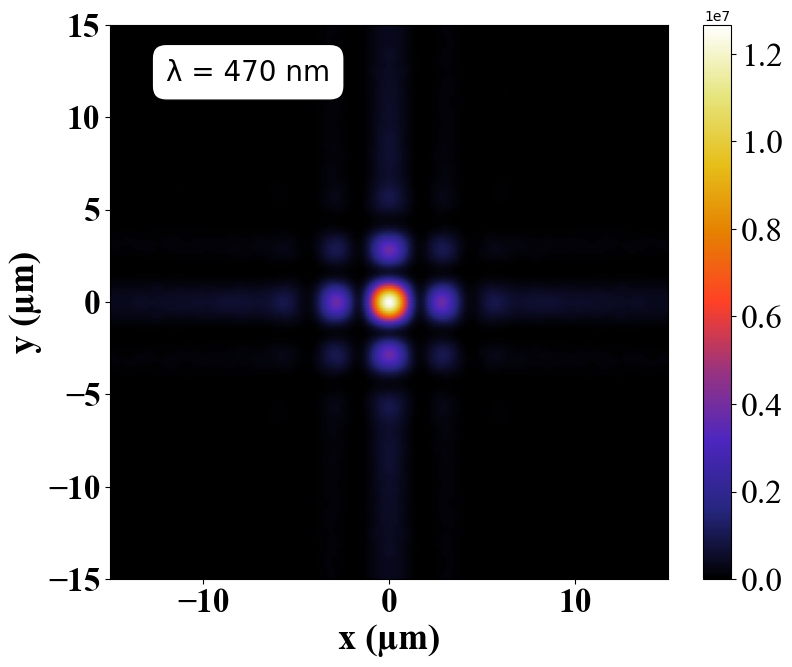

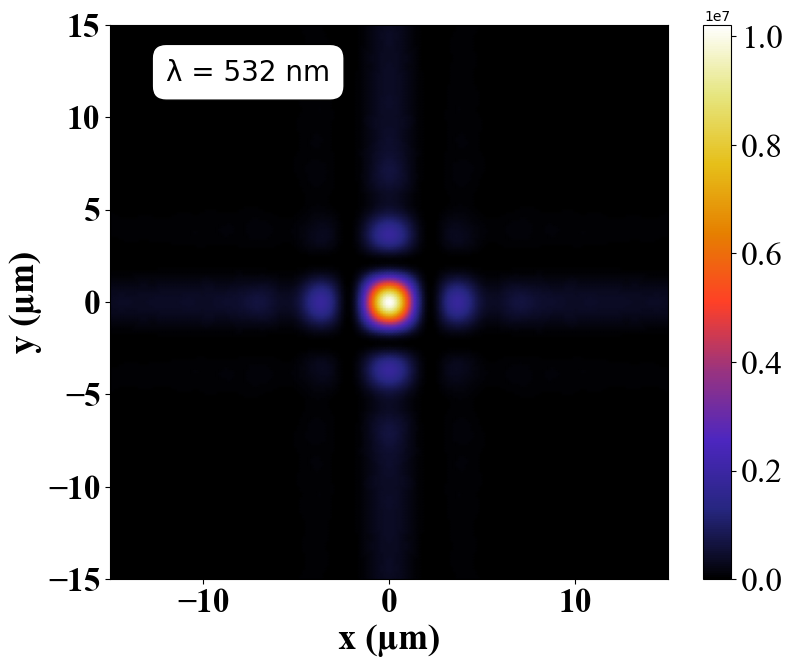

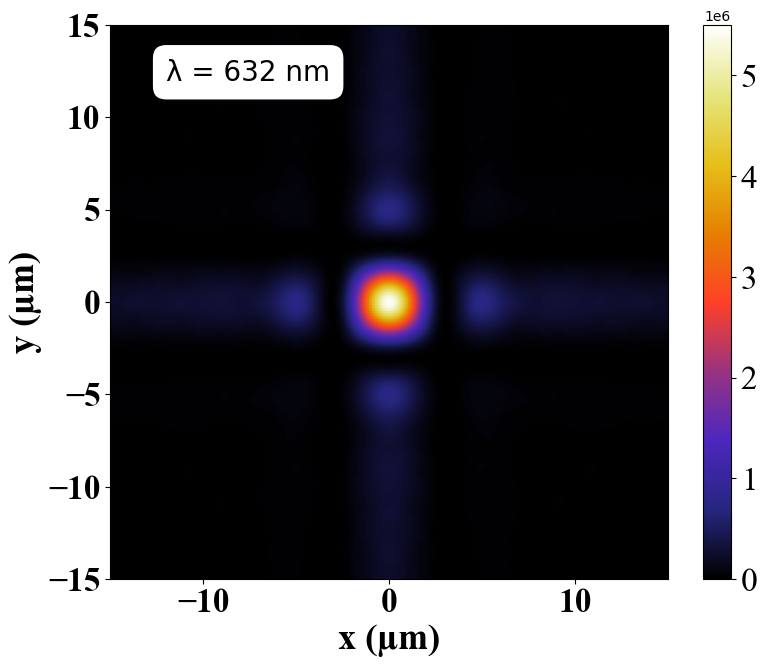

In [5]:
xy_x = 30.
xy_z = 90.
sampling = 201
for lamb0 in [0.47, 0.532, 0.6328]:
    sim_focal_XY(lens = lens, lamb0 = lamb0, cx = 0, cy =0, xy_x = xy_x, xy_z = xy_z, sampling = sampling)